# Dependencies

__`numpy
scipy
matplotlib
seaborn
networkx
moviepy
tqdm`__

In [9]:
from abm_model import *
# if using a dark theme for your jupyter notebook viewer, you may want to run this cell to make things visible
plt.style.use('seaborn-darkgrid')

# Arguments for run_automaton function:
- __`fit_land`__: Fitness landscape array of shape (2^N,). Used to define division rates of allele type
- __`n_gen`__: an integer number of generations to simulate forward the ABM model [defaults to `40`]
- __`mut_rate`__: probability of mutation per generation [defaults to `0.01`]
- __`max_cells`__: Maximum number of cells. Cells will not divide after if max number reached. However, they continue to die and mutate. If more space created cells can divide again [defaults to `10^5`]
- __`death_rate`__: probability of mutation per generation [defaults to `0.05`]

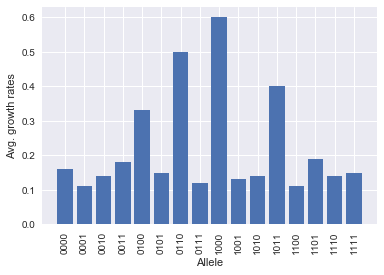

In [31]:
fit_land = np.array([0.16, 0.11, 0.14, 0.18, 0.33, 0.15, 0.5 , 0.12, 0.6, 0.13, 0.14, 0.4, 0.11, 0.19, 0.14, 0.15])
plt.bar(np.arange(len(fit_land)), fit_land )
plt.ylabel('Avg. growth rates')
plt.xlabel('Allele')
ticks = [int_to_binary(mm) for mm in np.arange(len(fit_land))]
plt.xticks(np.arange(len(fit_land)), ticks, rotation=90);

### Run automaton here

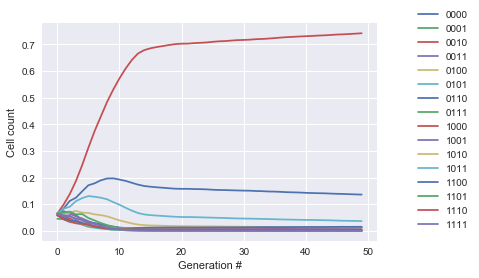

In [32]:
P, counts =run_automaton(fit_land,  n_gen = 50, mut_rate = 0.01, death_rate = 0.05 , max_cells=10**5)
counts = np.transpose( counts.T/counts.sum(axis=1) )
for mm in range(len(fit_land)):
    plt.plot(np.arange(len(counts)), counts[:,mm], label=bin(mm)[2:].zfill(4) )

plt.legend(bbox_to_anchor=(1.3,1.1))
plt.xlabel('Generation #')
plt.ylabel('Cell count');

### Animate the results

In [33]:
P, counts =run_automaton(fit_land,  n_gen = 40, mut_rate = 0.01, death_rate = 0.05 , max_cells=10**5)
animation, num_fps = animate_histogram(counts, num_fps = 10)
# animation.write_videofile('./animation.mp4', fps=num_fps) # export as video
# animation.write_gif( './animation.gif' , fps = num_fps ) #Slower
animation.ipython_display(fps=num_fps, loop=True, autoplay=True)

 98%|█████████▊| 40/41 [00:07<00:00,  4.78it/s]
